In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [5]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [6]:
!ls

commit0975f52_l6g2m0_results.hdf5  presparserun_results.hdf5
commitb86c5a_l6g2m0_results.hdf5   runme.sh
copy_data.py			   sparserun_l6g2m0_results.hdf5
extracted_contrib_scores.npy	   sparserun_results.hdf5
extracted_hypothetical_scores.npy  trial1.deeplift.imp_score.h5
extracted_onehot.npy		   trial1.modisco.h5
myrun_results.hdf5		   TryBpNet.ipynb
presparserun_l8g3m2_results.hdf5   TryBpNet-MEMEinit.ipynb


In [7]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

In [8]:
"""#visualize the patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)"""

'#visualize the patterns:\n%matplotlib inline\nfrom modisco.visualization import viz_sequence\nfor idx,pattern in enumerate(patterns):\n    print("pattern idx",idx)\n    print(len(pattern.seqlets))\n    viz_sequence.plot_weights(\n        pattern["Nanog_profile_wn_contrib_scores"].fwd)\n    viz_sequence.plot_weights(pattern["sequence"].fwd)'

/mnt/lab_data2/avanti/tfmodisco
commit 8911816e81a85e738e9714d4f63abc4f04e87519 (HEAD -> cluster_init, origin/cluster_init)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Thu Apr 16 04:11:49 2020 -0700

    With Leiden instead of Louvain
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 4.399210496
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


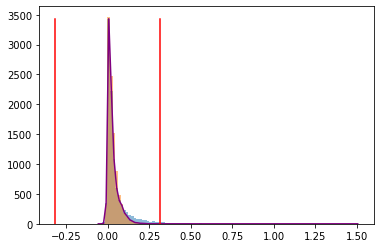

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9698999852203116
MEMORY 6.337134592
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 6.33800704
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)

TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 6.339629056
Beginning embedding computation
Computing embeddings
MAKING A SESSION


Finished embedding computation in 23.24 s
Starting affinity matrix computations
Normalization computed in 4.18 s
Cosine similarity mat computed in 202.59 s
Normalization computed in 4.12 s
Cosine similarity mat computed in 203.86 s
Finished affinity matrix computations in 430.06 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 17.22007

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.8244361542348414


  2%|▏         | 1/50 [00:10<08:18, 10.17s/it]

Quality: 0.8251603217814647


  4%|▍         | 2/50 [00:27<09:47, 12.23s/it]

Quality: 0.8268218857932166


 30%|███       | 15/50 [03:12<07:35, 13.03s/it]

Quality: 0.8270255417299403


 58%|█████▊    | 29/50 [06:35<04:53, 13.98s/it]

Quality: 0.8270553069557885


100%|██████████| 50/50 [11:05<00:00, 13.30s/it]

Got 42 clusters after round 1
Counts:
{7: 1292, 6: 1305, 31: 70, 1: 1814, 3: 1717, 22: 133, 12: 617, 9: 777, 4: 1670, 10: 678, 18: 315, 2: 1801, 8: 974, 5: 1656, 13: 595, 23: 128, 36: 38, 0: 2164, 32: 58, 11: 669, 15: 367, 26: 92, 27: 91, 17: 320, 19: 288, 16: 343, 37: 28, 20: 226, 28: 90, 30: 72, 21: 134, 40: 17, 24: 101, 38: 26, 29: 83, 14: 414, 33: 55, 25: 96, 34: 54, 39: 18, 35: 49, 41: 10}
MEMORY 8.502493184
(Round 1) Aggregating seqlets in each cluster
MEMORY 8.502493184
Aggregating for cluster 0 with 2164 seqlets
MEMORY 8.502493184


Trimmed 53 out of 2164
Skipped 1 seqlets
Aggregating for cluster 1 with 1814 seqlets
MEMORY 8.515039232
Trimmed 117 out of 1814
Aggregating for cluster 2 with 1801 seqlets
MEMORY 8.517525504
Trimmed 72 out of 1801
Aggregating for cluster 3 with 1717 seqlets
MEMORY 8.522399744
Trimmed 118 out of 1717
Skipped 1 seqlets
Aggregating for cluster 4 with 1670 seqlets
MEMORY 8.526118912
Trimmed 29 out of 1670
Aggregating for cluster 5 with 1656 seqlets
MEMORY 8.530518016
Trimmed 59 out of 1656
Aggregating for cluster 6 with 1305 seqlets
MEMORY 8.534929408
Trimmed 80 out of 1305
Aggregating for cluster 7 with 1292 seqlets
MEMORY 8.535003136
Trimmed 67 out of 1292
Aggregating for cluster 8 with 974 seqlets
MEMORY 8.53919744
Trimmed 89 out of 974
Aggregating for cluster 9 with 777 seqlets
MEMORY 8.539721728
Trimmed 39 out of 777
Aggregating for cluster 10 with 678 seqlets
MEMORY 8.541032448
Trimmed 70 out of 678
Aggregating for cluster 11 with 669 seqlets
MEMORY 8.541835264
Trimmed 97 out of 669


  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7886609756920974


  2%|▏         | 1/50 [00:19<15:53, 19.47s/it]

Quality: 0.7902088863008182


  4%|▍         | 2/50 [00:28<13:10, 16.48s/it]

Quality: 0.7907276577936063


 14%|█▍        | 7/50 [01:41<10:24, 14.53s/it]

Quality: 0.7907935161391169


100%|██████████| 50/50 [11:44<00:00, 14.09s/it]

Got 36 clusters after round 2
Counts:
{7: 1285, 0: 2177, 6: 1417, 5: 1561, 10: 645, 14: 456, 4: 1591, 2: 1681, 16: 310, 3: 1601, 22: 84, 26: 38, 1: 1696, 11: 539, 12: 530, 21: 121, 8: 1222, 9: 752, 24: 40, 32: 15, 18: 205, 13: 469, 15: 342, 28: 33, 17: 263, 30: 17, 19: 194, 23: 55, 29: 29, 20: 130, 27: 36, 33: 13, 25: 40, 35: 3, 31: 17, 34: 9}
MEMORY 7.850500096
(Round 2) Aggregating seqlets in each cluster
MEMORY 7.850500096
Aggregating for cluster 0 with 2177 seqlets
MEMORY 7.850500096


Trimmed 78 out of 2177
Aggregating for cluster 1 with 1696 seqlets
MEMORY 7.85870848
Trimmed 145 out of 1696
Aggregating for cluster 2 with 1681 seqlets
MEMORY 7.860826112
Trimmed 101 out of 1681
Skipped 1 seqlets
Removed 8 duplicate seqlets
Aggregating for cluster 3 with 1601 seqlets
MEMORY 7.86849792
Trimmed 112 out of 1601
Aggregating for cluster 4 with 1591 seqlets
MEMORY 7.868899328
Trimmed 148 out of 1591
Removed 1 duplicate seqlets
Aggregating for cluster 5 with 1561 seqlets
MEMORY 7.872512
Trimmed 143 out of 1561
Removed 1 duplicate seqlets
Aggregating for cluster 6 with 1417 seqlets
MEMORY 7.876227072
Trimmed 146 out of 1417
Skipped 1 seqlets
Removed 5 duplicate seqlets
Aggregating for cluster 7 with 1285 seqlets
MEMORY 7.878950912
Trimmed 69 out of 1285
Removed 6 duplicate seqlets
Aggregating for cluster 8 with 1222 seqlets
MEMORY 7.883010048
Trimmed 119 out of 1222
Aggregating for cluster 9 with 752 seqlets
MEMORY 7.884054528
Trimmed 91 out of 752
Removed 3 duplicate seqlets

After 1 runs, maximum modularity is Q = 0.020606
Louvain completed 21 runs in 5.147262811660767 seconds
Similarity is 0.822928; is_dissimilar is False
Got 2 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.11913371086120605 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0146596
After 2 runs, maximum modularity is Q = 0.0151289
Louvain completed 22 runs in 5.791585922241211 seconds
Similarity is 0.89264584; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.16701269149780273 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0170112
After 3 runs, maximum modularity is Q = 0.0170137
Louvain completed 23 runs in 6.052305698394775 seconds
Similarity is 0.8441603; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.12810778617858887 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity i

In [9]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        kmer_len=6,
        num_gaps=2,
        num_mismatches=0,
        n_cores=10,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [10]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "commit891181_nomemeinit_l6g2m0_results.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 3867
Task 0 hypothetical scores:


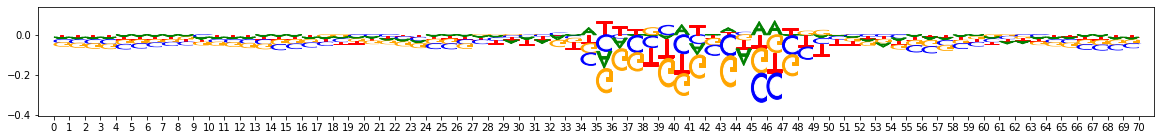

Task 0 actual importance scores:


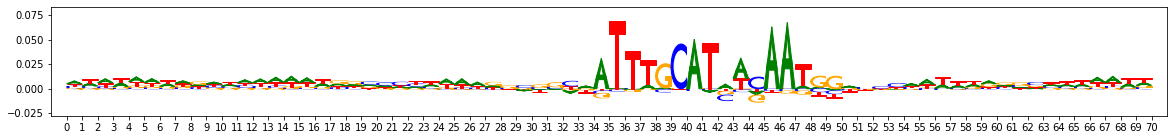

onehot, fwd and rev:


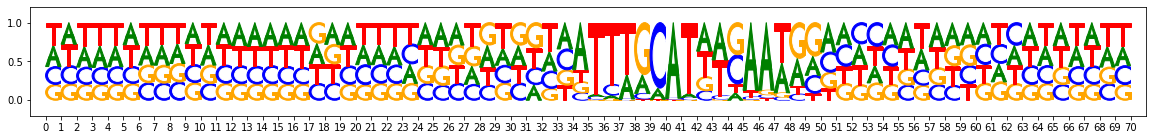

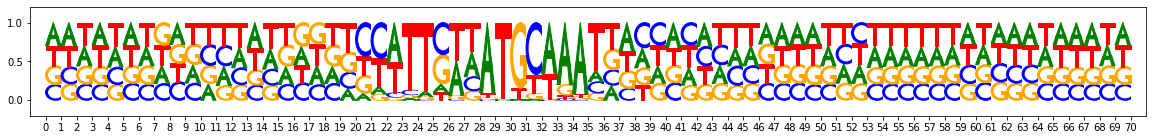

metacluster_0 pattern_1
total seqlets: 3304
Task 0 hypothetical scores:


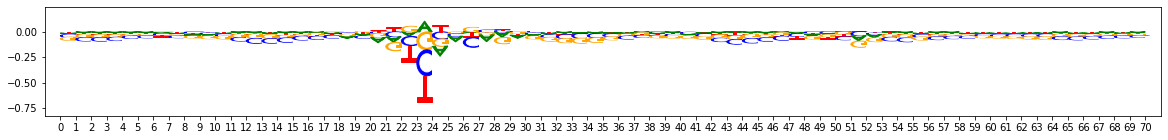

Task 0 actual importance scores:


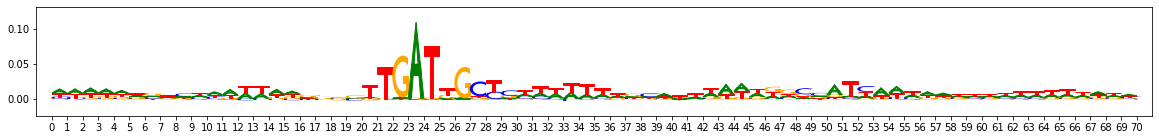

onehot, fwd and rev:


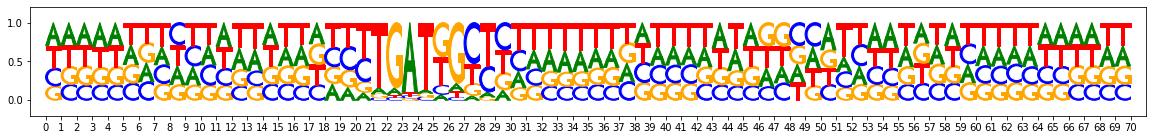

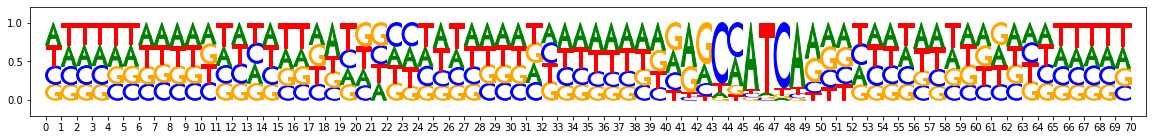

metacluster_0 pattern_2
total seqlets: 3000
Task 0 hypothetical scores:


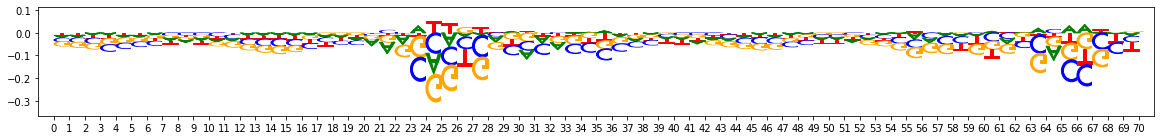

Task 0 actual importance scores:


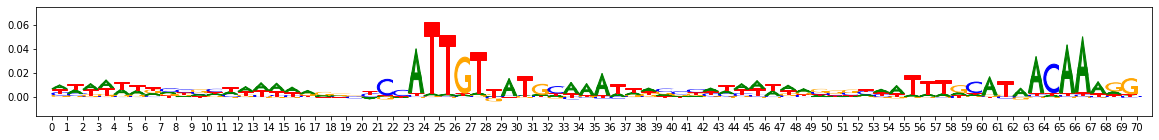

onehot, fwd and rev:


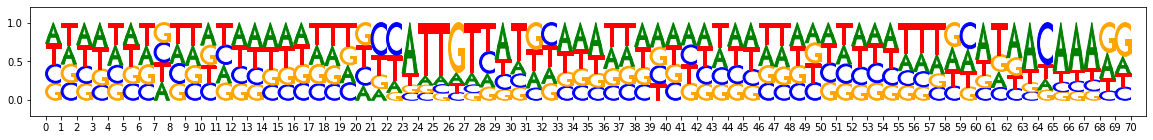

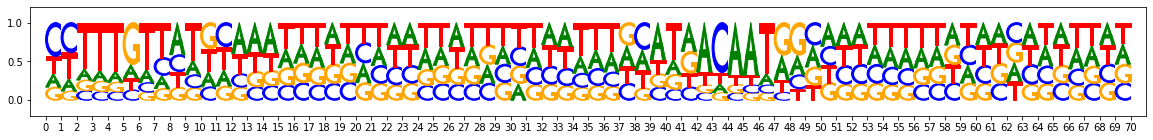

metacluster_0 pattern_3
total seqlets: 1584
Task 0 hypothetical scores:


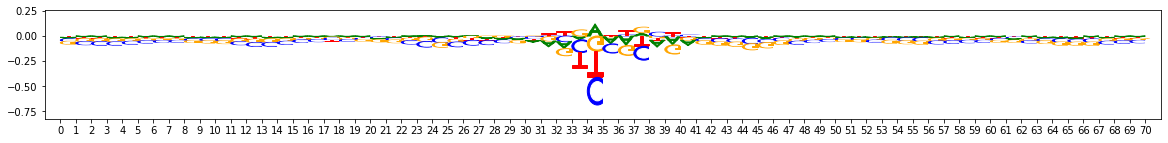

Task 0 actual importance scores:


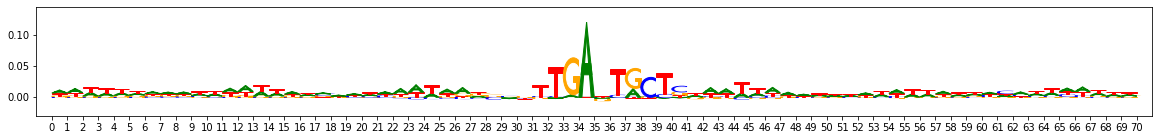

onehot, fwd and rev:


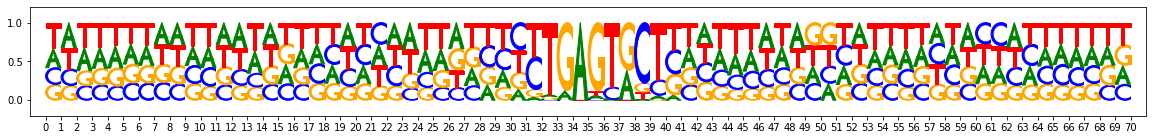

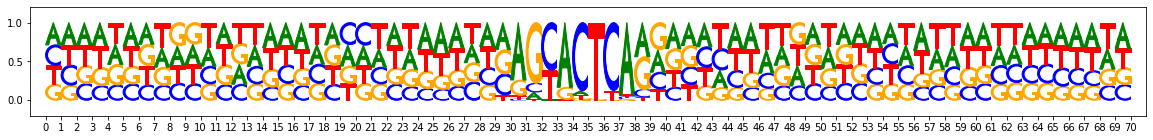

metacluster_0 pattern_4
total seqlets: 1495
Task 0 hypothetical scores:


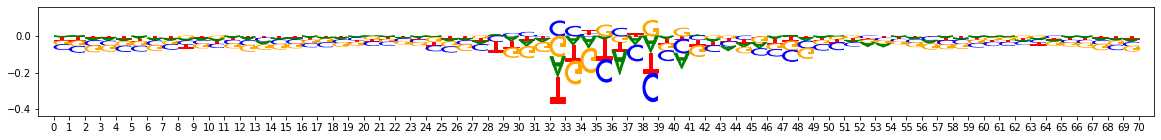

Task 0 actual importance scores:


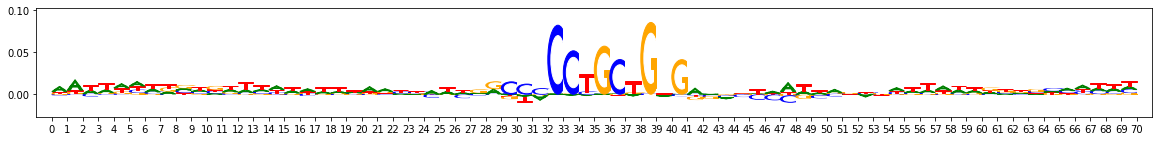

onehot, fwd and rev:


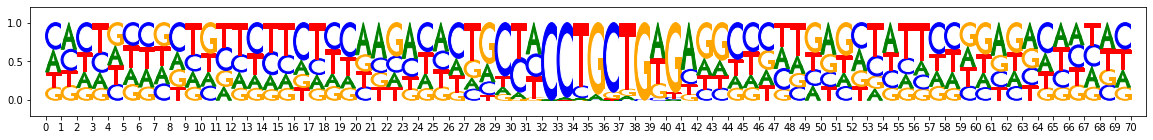

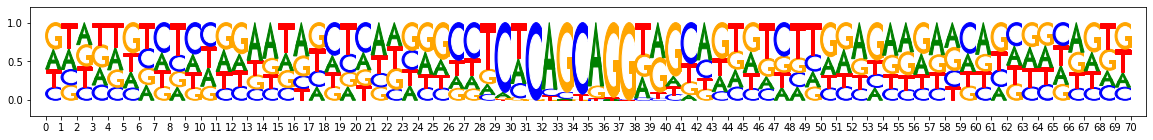

metacluster_0 pattern_5
total seqlets: 1115
Task 0 hypothetical scores:


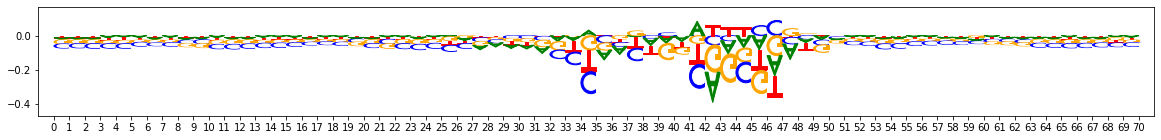

Task 0 actual importance scores:


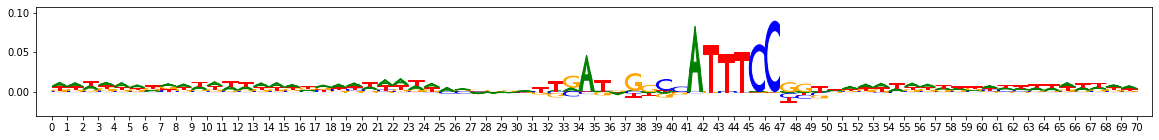

onehot, fwd and rev:


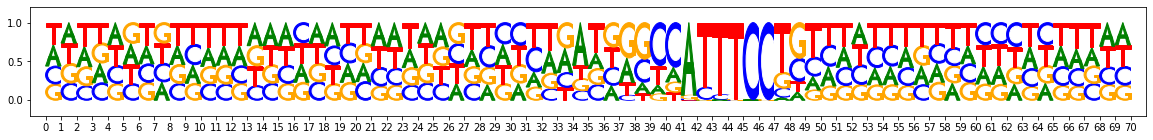

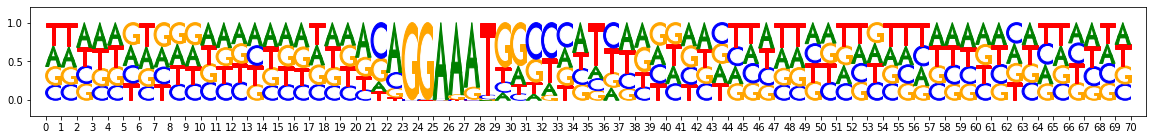

metacluster_0 pattern_6
total seqlets: 617
Task 0 hypothetical scores:


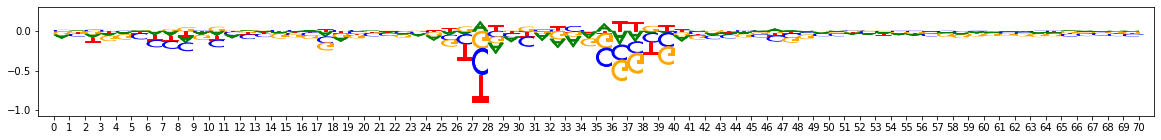

Task 0 actual importance scores:


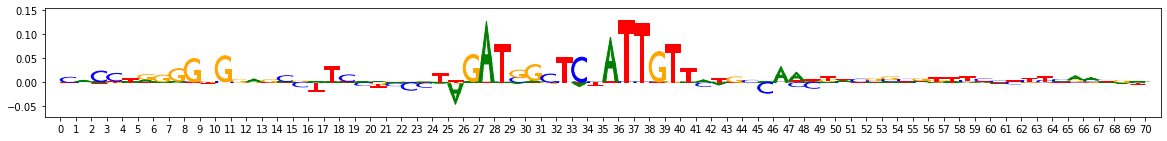

onehot, fwd and rev:


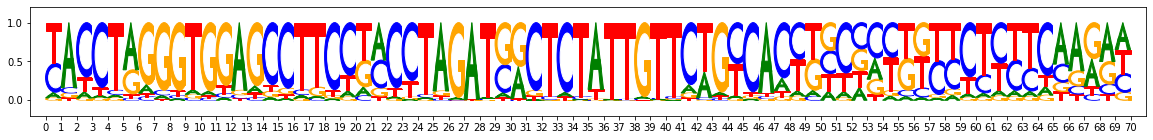

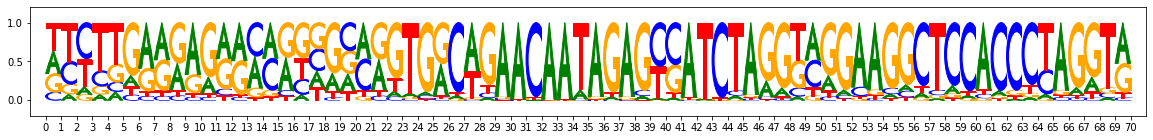

metacluster_0 pattern_7
total seqlets: 491
Task 0 hypothetical scores:


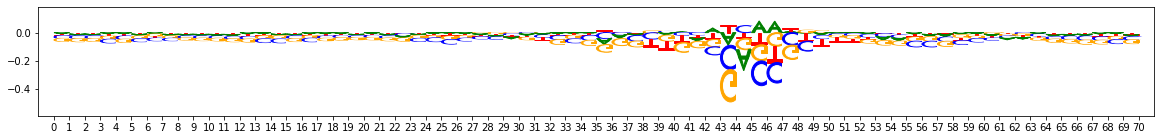

Task 0 actual importance scores:


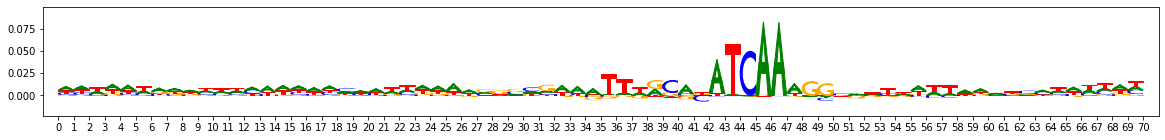

onehot, fwd and rev:


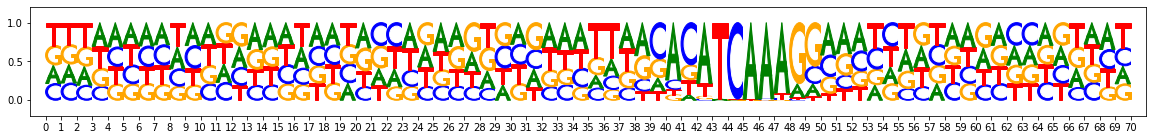

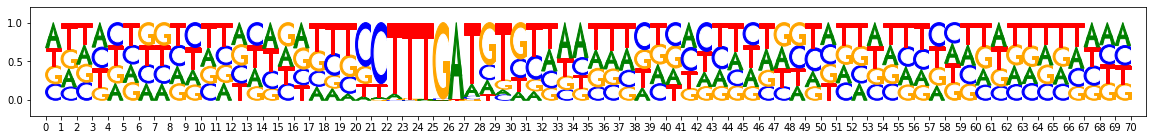

metacluster_0 pattern_8
total seqlets: 316
Task 0 hypothetical scores:


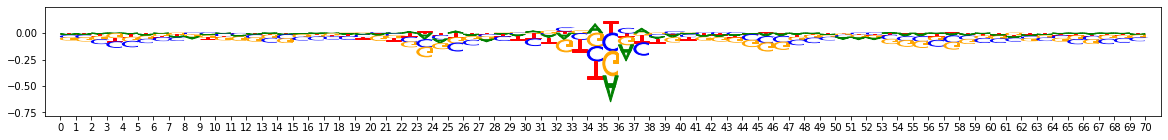

Task 0 actual importance scores:


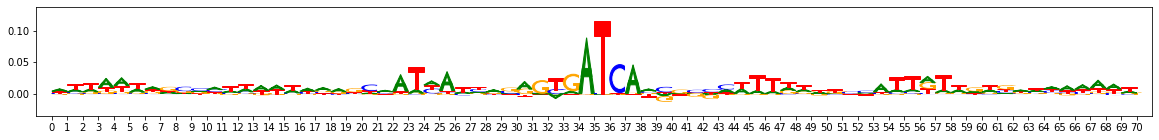

onehot, fwd and rev:


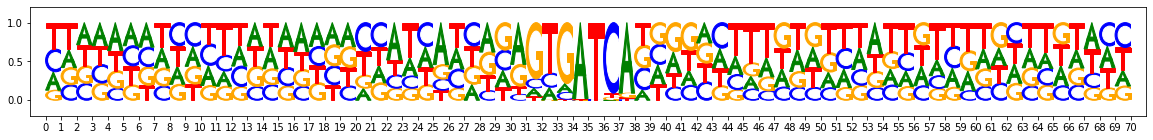

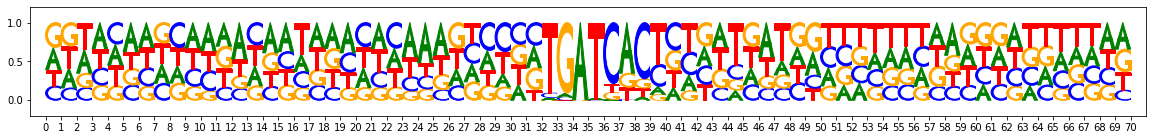

metacluster_0 pattern_9
total seqlets: 201
Task 0 hypothetical scores:


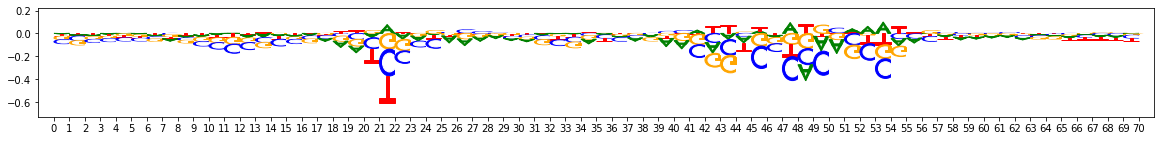

Task 0 actual importance scores:


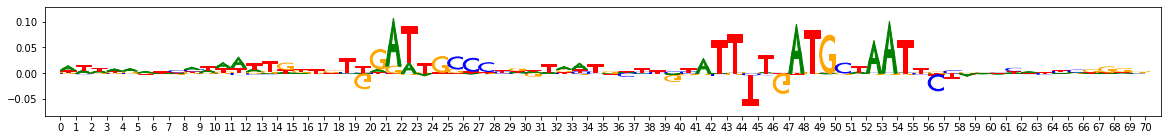

onehot, fwd and rev:


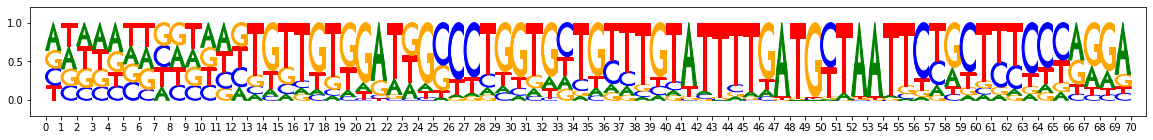

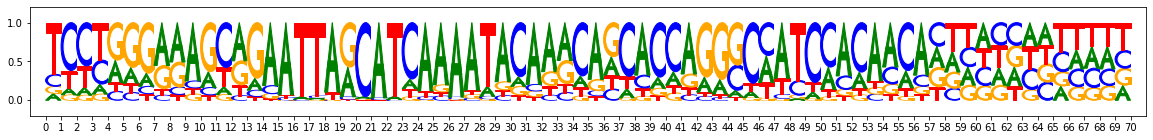

metacluster_0 pattern_10
total seqlets: 266
Task 0 hypothetical scores:


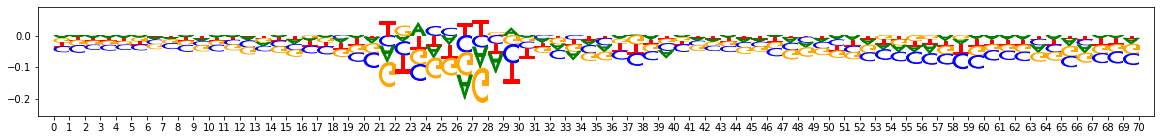

Task 0 actual importance scores:


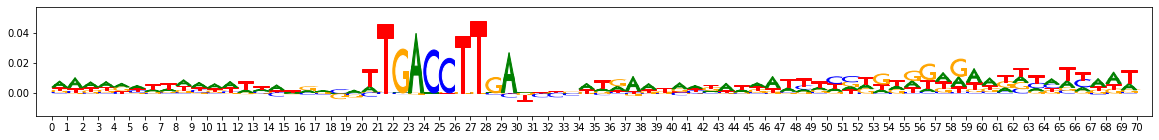

onehot, fwd and rev:


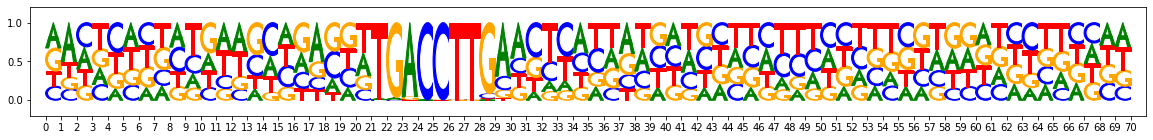

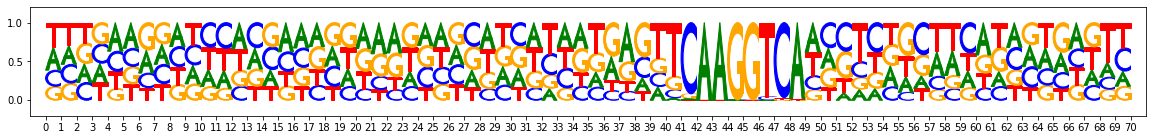

metacluster_0 pattern_11
total seqlets: 195
Task 0 hypothetical scores:


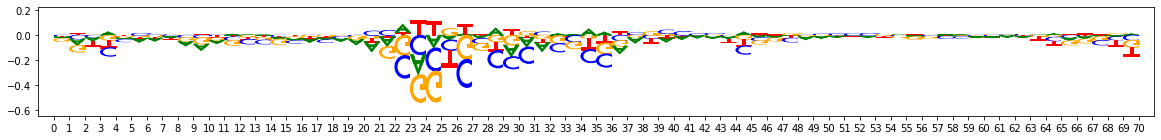

Task 0 actual importance scores:


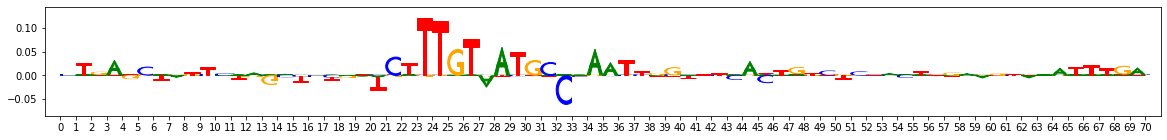

onehot, fwd and rev:


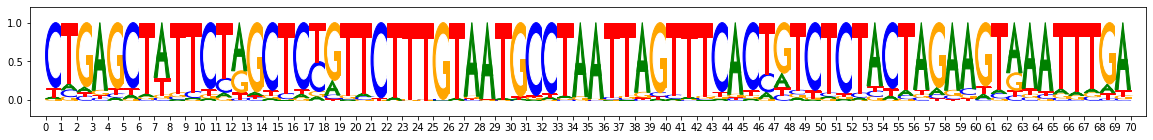

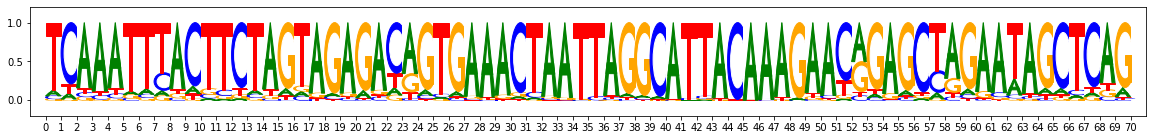

metacluster_0 pattern_12
total seqlets: 164
Task 0 hypothetical scores:


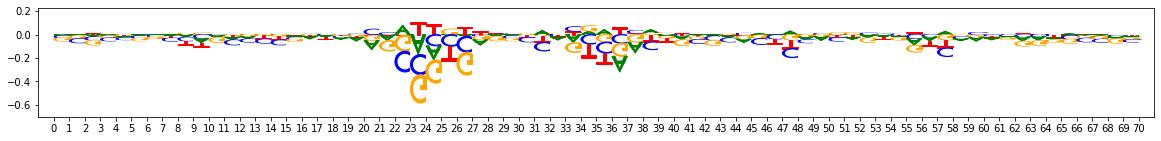

Task 0 actual importance scores:


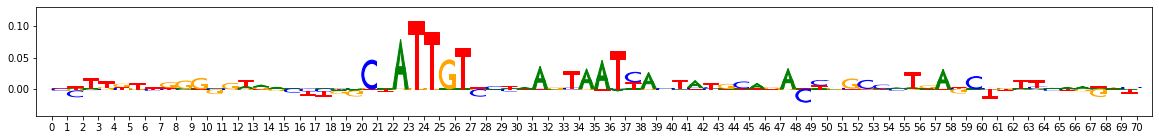

onehot, fwd and rev:


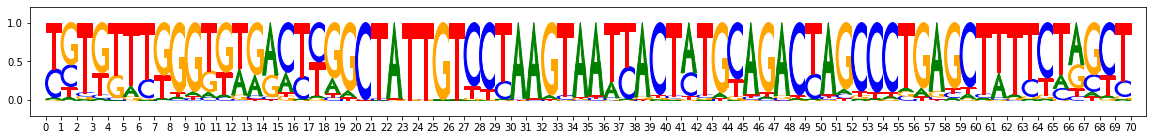

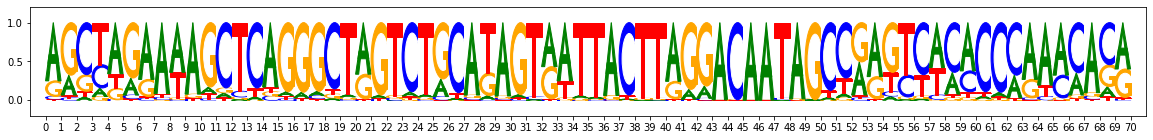

metacluster_0 pattern_13
total seqlets: 165
Task 0 hypothetical scores:


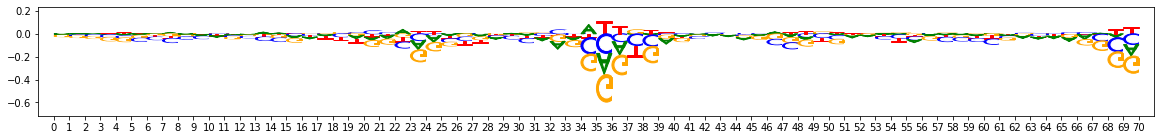

Task 0 actual importance scores:


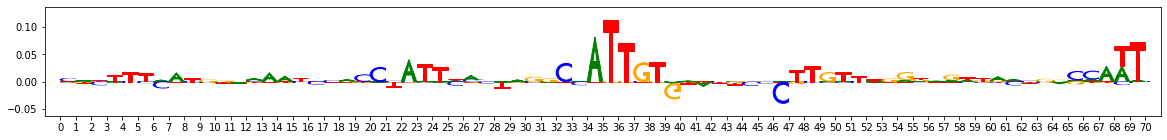

onehot, fwd and rev:


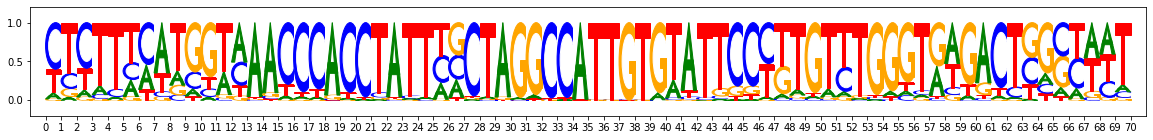

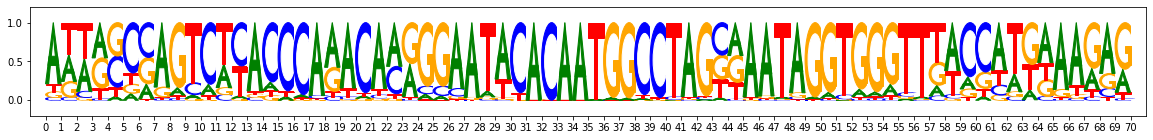

metacluster_0 pattern_14
total seqlets: 129
Task 0 hypothetical scores:


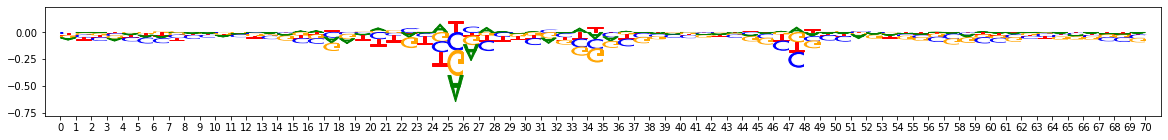

Task 0 actual importance scores:


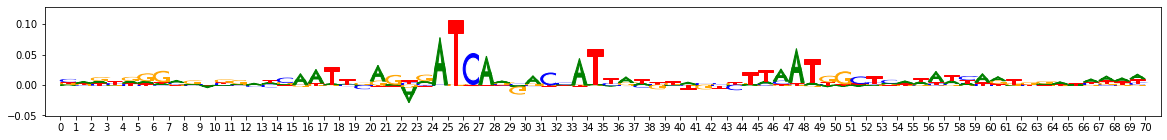

onehot, fwd and rev:


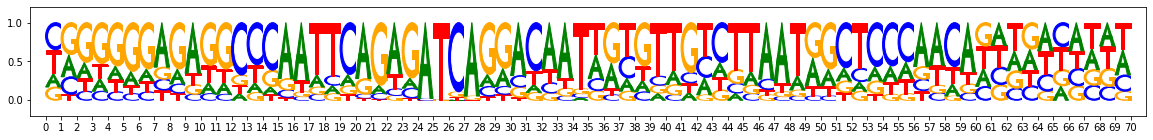

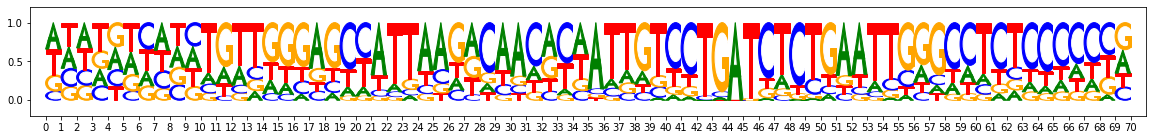

metacluster_0 pattern_15
total seqlets: 98
Task 0 hypothetical scores:


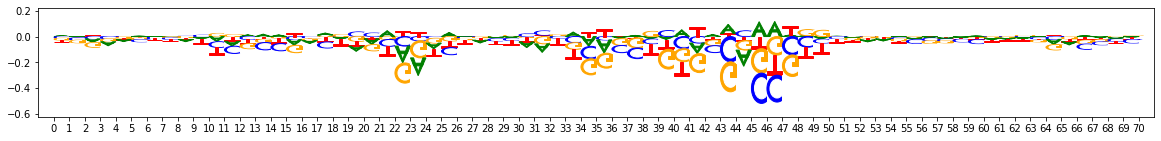

Task 0 actual importance scores:


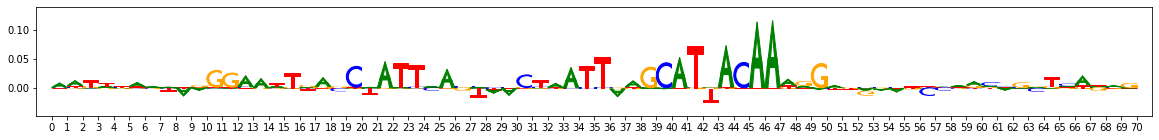

onehot, fwd and rev:


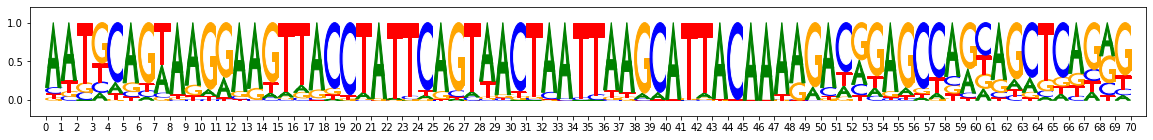

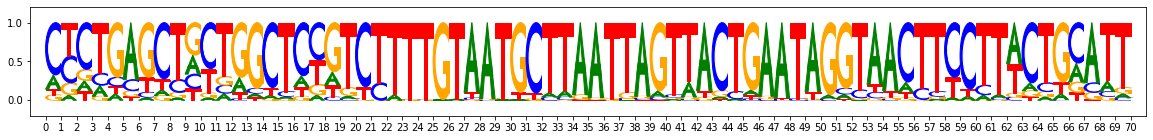

metacluster_0 pattern_16
total seqlets: 87
Task 0 hypothetical scores:


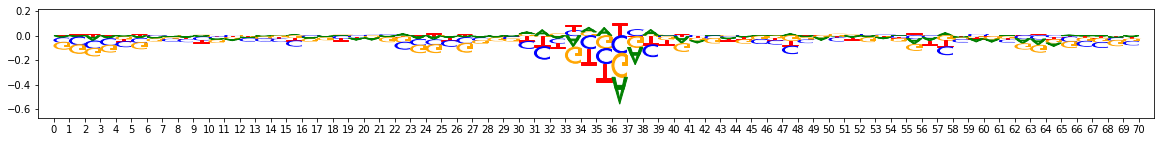

Task 0 actual importance scores:


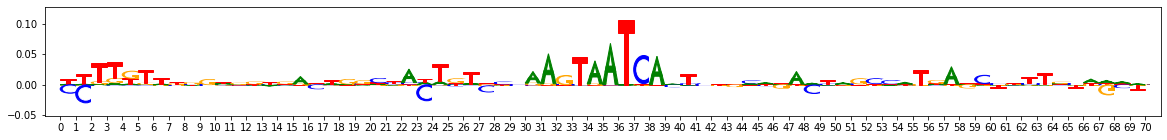

onehot, fwd and rev:


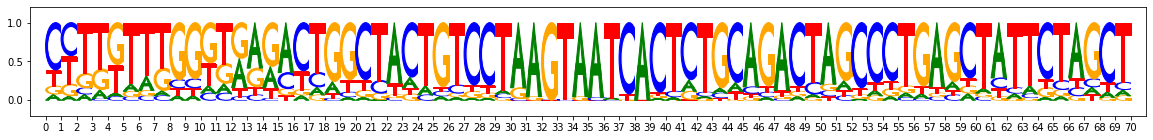

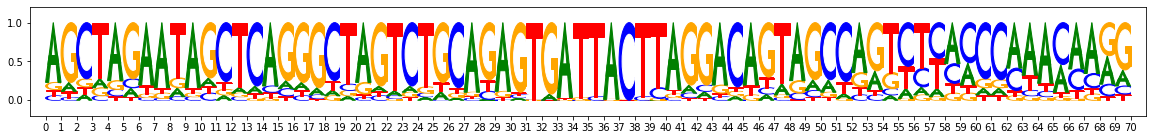

metacluster_0 pattern_17
total seqlets: 95
Task 0 hypothetical scores:


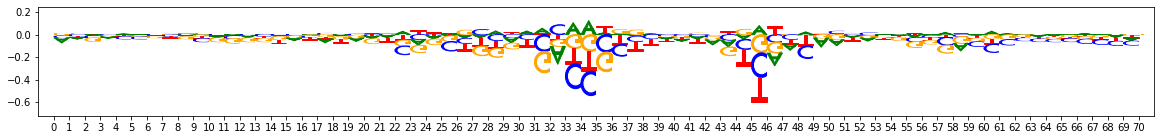

Task 0 actual importance scores:


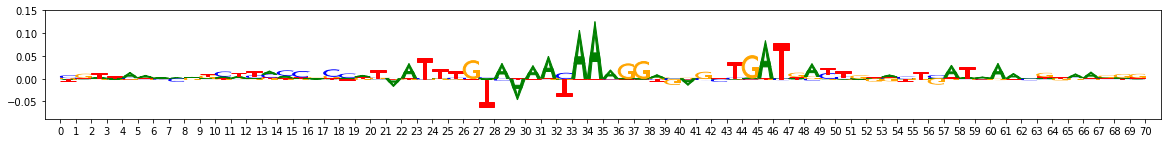

onehot, fwd and rev:


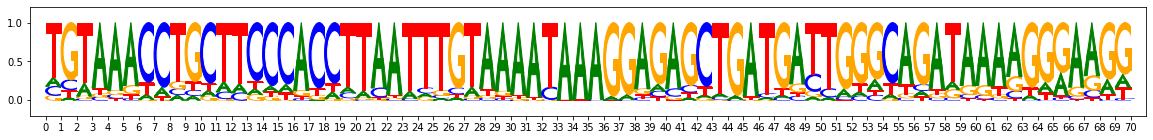

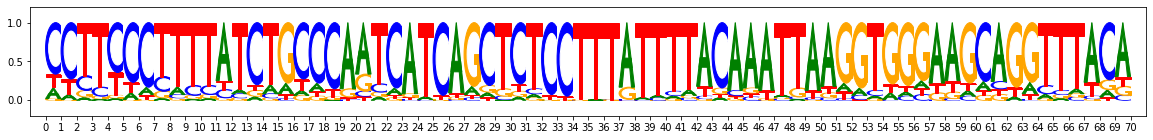

metacluster_0 pattern_18
total seqlets: 68
Task 0 hypothetical scores:


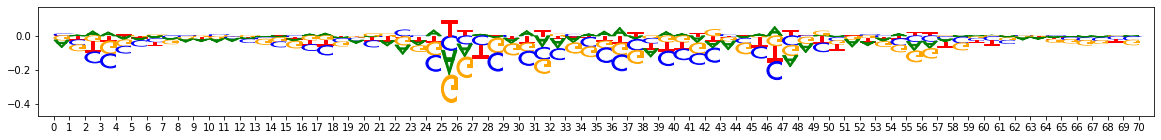

Task 0 actual importance scores:


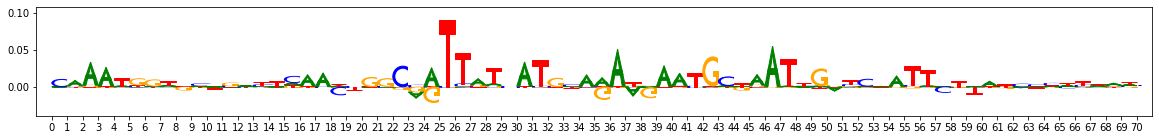

onehot, fwd and rev:


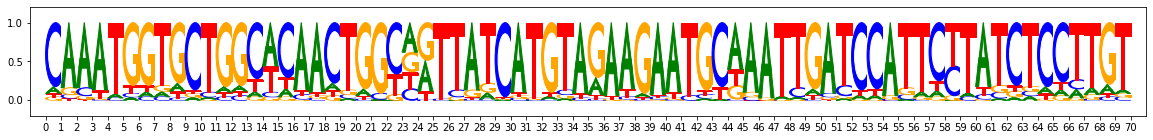

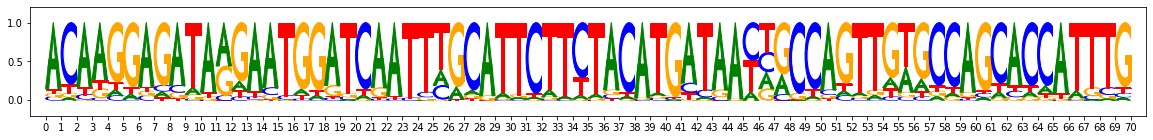

metacluster_0 pattern_19
total seqlets: 65
Task 0 hypothetical scores:


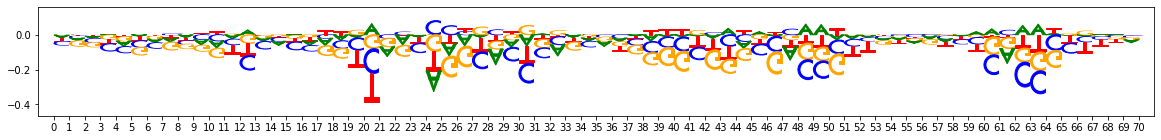

Task 0 actual importance scores:


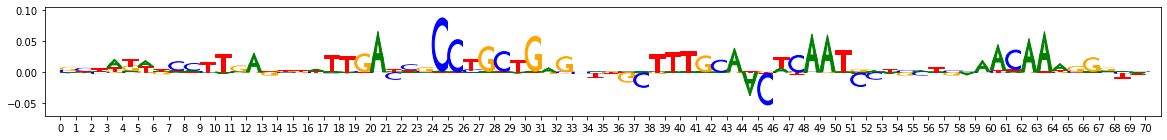

onehot, fwd and rev:


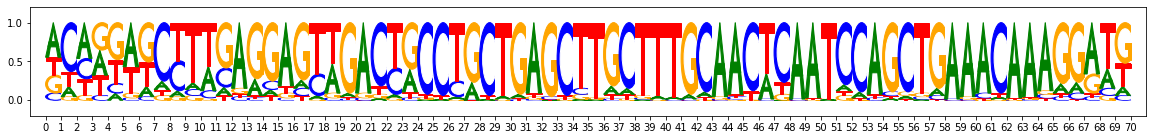

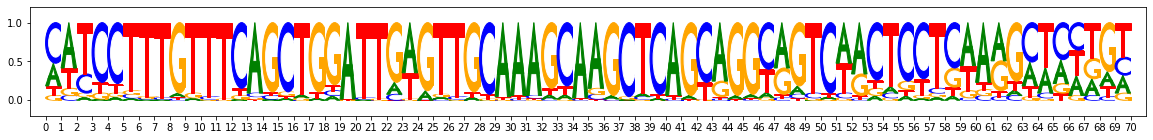

In [11]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()

In [12]:
from modisco.visualization import viz_sequence
meme_discovered_motifs = (results
    .metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result
    .each_round_initcluster_motifs[0])
for idx,motif in enumerate(meme_discovered_motifs):
    print("MEME-DISco motif number",idx)
    print("num seqlets:",len(motif.seqlets))
    viz_sequence.plot_weights(motif["Nanog_profile_wn_hypothetical_contribs"].fwd)
    viz_sequence.plot_weights(motif["sequence"].fwd)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
from modisco.visualization import viz_sequence
meme_discovered_motifs = (results
    .metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result
    .each_round_initcluster_motifs[1])
for idx,motif in enumerate(meme_discovered_motifs):
    print("MEME-DISco motif number",idx)
    print("num seqlets:",len(motif.seqlets))
    viz_sequence.plot_weights(motif["Nanog_profile_wn_hypothetical_contribs"].fwd)
    viz_sequence.plot_weights(motif["sequence"].fwd)